<a href="https://colab.research.google.com/github/adegoroye25/LaGuardia25/blob/main/PythonProject3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [255]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [267]:
#loading the data
from google.colab import files
uploaded = files.upload()

Saving NYPD_Arrest_Data.csv to NYPD_Arrest_Data.csv


In [276]:
#renaming the Arrest_Boro
df = pd.read_csv("NYPD_Arrest_Data.csv")
#df = df[df['OFNS_DESC'] != '(null)']
df['ARREST_BORO'] = df['ARREST_BORO'].replace("M", "Manhattan")
df['ARREST_BORO'] = df['ARREST_BORO'].replace("K", "Kings")
df['ARREST_BORO'] = df['ARREST_BORO'].replace("B", "Bronx")
df['ARREST_BORO'] = df['ARREST_BORO'].replace("Q", "Queens")
df['ARREST_BORO'] = df['ARREST_BORO'].replace("S", "Staten Island")
df

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,298874520,01/04/2025,439,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109.0,GRAND LARCENY,PL 1553004,F,Manhattan,7,0,25-44,M,BLACK,0,0,0.000000,0.000000,POINT (0 0)
1,298799078,01/02/2025,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Manhattan,23,0,25-44,F,BLACK,1000213,228833,40.794755,-73.942348,POINT (-73.9423482609703 40.79475532416718)
2,298921520,01/05/2025,779,"PUBLIC ADMINISTRATION,UNCLASSI",126.0,MISCELLANEOUS PENAL LAW,PL 215510B,F,Kings,76,0,45-64,M,WHITE,0,0,0.000000,0.000000,POINT (0 0)
3,299008265,01/07/2025,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Queens,113,0,45-64,M,BLACK,1046399,187126,40.680086,-73.775931,POINT (-73.775931 40.680086)
4,298969999,01/06/2025,793,WEAPONS POSSESSION 3,118.0,DANGEROUS WEAPONS,PL 2650201,F,Manhattan,5,73,25-44,M,WHITE,983907,199958,40.715526,-74.001238,POINT (-74.001238 40.715526)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71237,303938395,03/31/2025,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",113.0,FORGERY,PL 1702500,F,Manhattan,34,0,18-24,M,BLACK HISPANIC,1004367,254624,40.865536,-73.927268,POINT (-73.9272684 40.86553571)
71238,303885891,03/30/2025,478,"THEFT OF SERVICES, UNCLASSIFIE",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,Bronx,43,1,18-24,F,BLACK,1022565,242793,40.833003,-73.861542,POINT (-73.8615425 40.83300293)
71239,303937884,03/31/2025,439,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109.0,GRAND LARCENY,PL 1553501,F,Manhattan,13,0,25-44,M,WHITE HISPANIC,988986,207106,40.735143,-73.982909,POINT (-73.982909 40.735143)
71240,303887215,03/30/2025,478,"THEFT OF SERVICES, UNCLASSIFIE",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,Bronx,47,1,25-44,M,BLACK,1022187,261218,40.883576,-73.862804,POINT (-73.86280418 40.8835756)


,count
OFNS_DESC,
ASSAULT 3 & RELATED OFFENSES,9211
PETIT LARCENY,7468
DANGEROUS DRUGS,6167
FELONY ASSAULT,5294
MISCELLANEOUS PENAL LAW,4740
OTHER OFFENSES RELATED TO THEFT,4661
VEHICLE AND TRAFFIC LAWS,4586
CRIMINAL MISCHIEF & RELATED OF,3044
DANGEROUS WEAPONS,2649


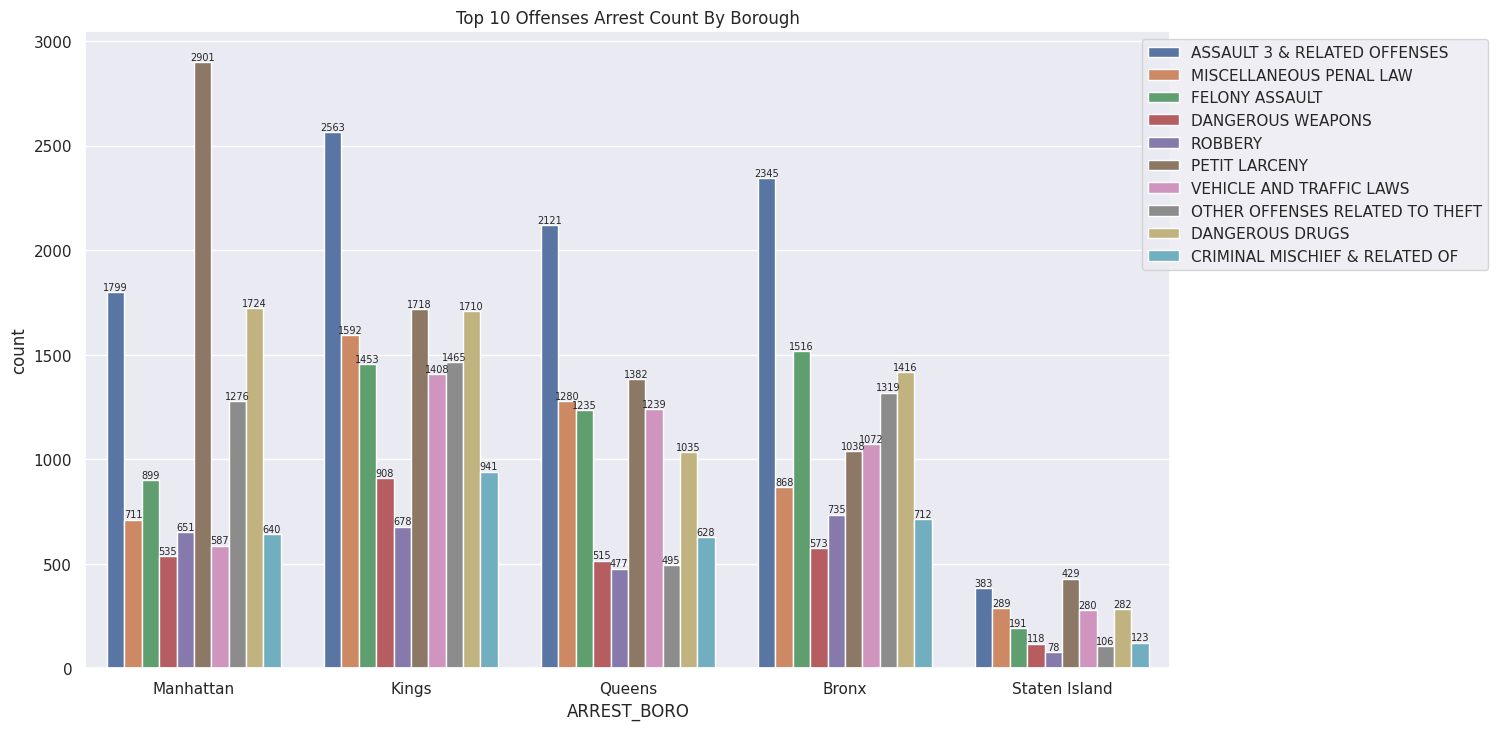

In [277]:
#Selecting the top 10 of the offenses arrest out of the 56 offenses
topten = df["OFNS_DESC"].value_counts().head(10)
top_10_df = df[df["OFNS_DESC"].isin(topten.index)]

#Visualization
ax=sns.countplot(data=top_10_df, x='ARREST_BORO', hue='OFNS_DESC')
sns.set_theme(rc={'figure.figsize':(14,8.27)})
plt.setp(ax.get_legend().get_texts(), fontsize='8.0')
for bars in ax.containers: ax.bar_label(bars, fmt='%.0f', fontsize=7)
plt.legend(loc='lower right')
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))
plt.title("Top 10 Offenses Arrest Count By Borough")
topten

,count
ARREST_BORO,
Kings,2563
Bronx,2345
Queens,2121
Manhattan,1799
Staten Island,383


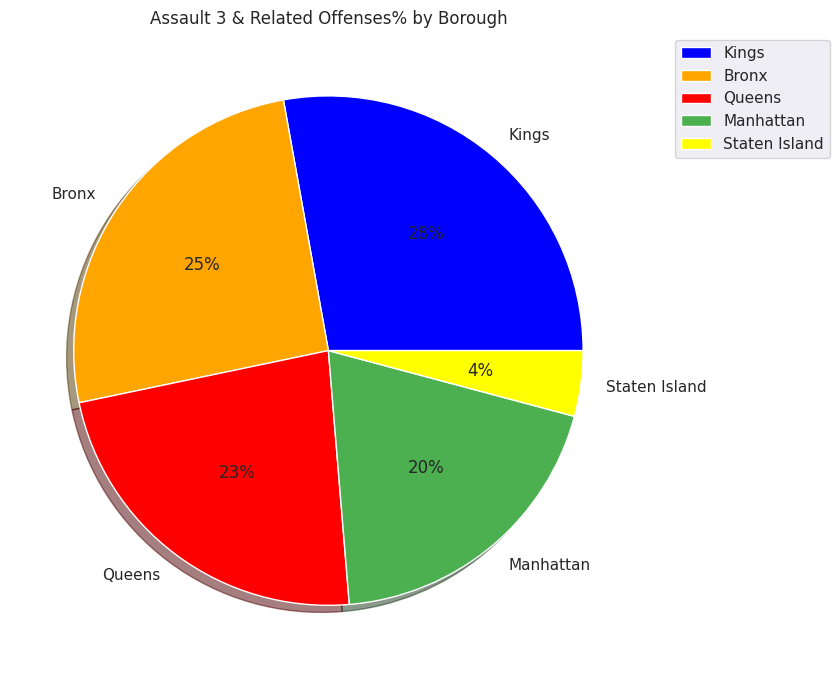

In [278]:
#Selecting Assault 3 & Related Offenses which is the highest offense arrest out of the 56 offenses
ndf = df[df['OFNS_DESC'] == "ASSAULT 3 & RELATED OFFENSES"]

#Getting the count of Assault 3 & Related Offenses by Arrest Borough
topten = ndf["ARREST_BORO"].value_counts().head(10)

#Visualization
mycolors = ["blue", "orange", "red", "#4CAF50","yellow"]
plt.pie(ndf["ARREST_BORO"].value_counts(), labels = topten.index, colors= mycolors, shadow = True, autopct='%.0f%%')
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))
plt.title("Assault 3 & Related Offenses% by Borough")
topten

,count
AGE_GROUP,
25-44,5449
45-64,1794
18-24,1374
<18,344
65+,250


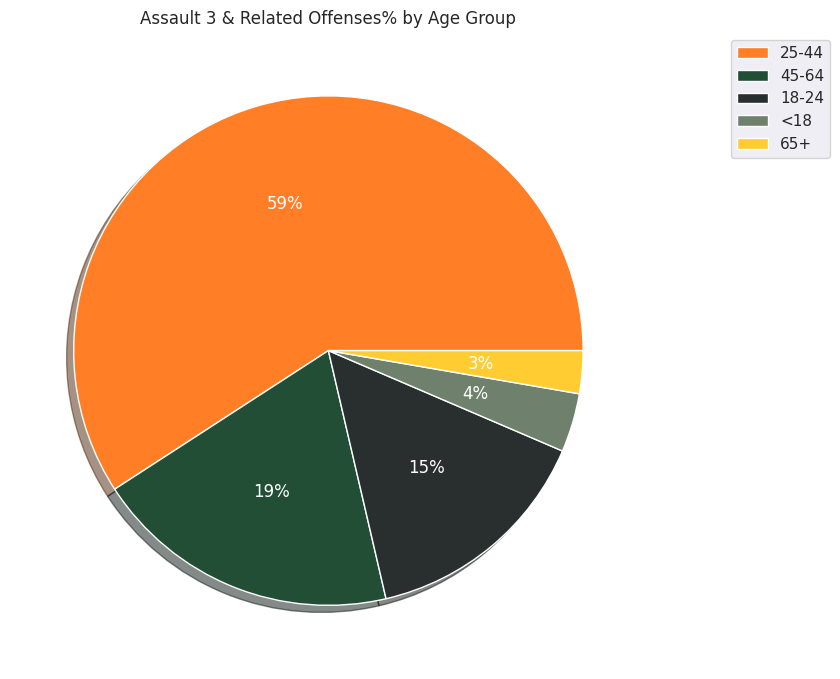

In [279]:
#Selecting Assault 3 & Related Offenses which is the highest offense arrest out of the 56 offenses
ndf = df[df['OFNS_DESC'] == "ASSAULT 3 & RELATED OFFENSES"]

#Getting the count of Assault 3 & Related Offenses by Age Group
topten = ndf["AGE_GROUP"].value_counts().head(10)

#Visualization
mycolors = ["#ff7e26", "#214e35", "#292e2f", "#6f816d", "#ffcd31"]
plt.pie(ndf["AGE_GROUP"].value_counts(), labels = topten.index, colors= mycolors, shadow = True, autopct='%.0f%%', textprops={'color': 'white'})
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))
plt.title("Assault 3 & Related Offenses% by Age Group")
topten

,count
PERP_SEX,
M,6637
F,2574


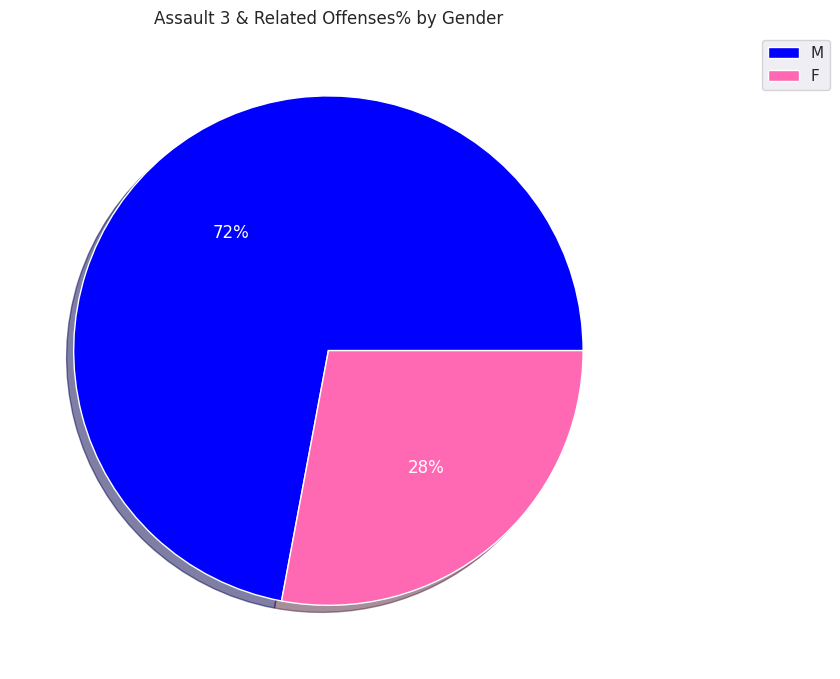

In [272]:
#Selecting Assault 3 & Related Offenses which is the highest offense arrest out of the 56 offenses
ndf = df[df['OFNS_DESC'] == "ASSAULT 3 & RELATED OFFENSES"]

#Getting the count of Assault 3 & Related Offenses by Gender
topten = ndf["PERP_SEX"].value_counts().head(10)

#Visualization
mycolors = ["blue","hotpink"]
plt.pie(ndf["PERP_SEX"].value_counts(), labels = topten.index, colors= mycolors, shadow = True, autopct='%.0f%%', textprops={'color': 'white'})
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))
plt.title("Assault 3 & Related Offenses% by Gender")
topten